In [2]:
import os
os.chdir('/home/infres/ext-6343/venv_ml_art/ml-art')
import json
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from torch import nn
from utils import *
from models import *

# from sklearn.metrics.pairwise import cosine_similarity



/home/infres/ext-6343/venv_ml_art/lib64/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the model

In [3]:
autoencoder=torch.load("/home/infres/ext-6343/venv_ml_art/ml-art/saved_results/autoencoder__pretrained_120_mse_adam_0.0001/saved_model/model.pth").to("cpu")
decoder=autoencoder.decoder
encoder=autoencoder.encoder


Test

In [4]:
pil_image_file = Image.open("/home/infres/ext-6343/venv_ml_art/ml-art/data/western/137.png")
tensor = transforms.ToTensor()(transforms.Resize((256, 256))(pil_image_file)).unsqueeze(dim=0)

In [5]:
features=encoder(tensor)

In [6]:
print(features.shape)

torch.Size([1, 4096])


Results of the whole model

In [7]:
reconstructed=decoder(features)

Text(0.5, 1.0, 'Reconstructed image')

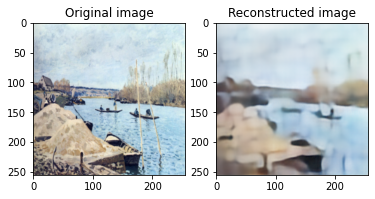

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(transforms.ToPILImage()(tensor.squeeze()))
ax1.set_title('Original image')

ax2.imshow(transforms.ToPILImage()(reconstructed.squeeze()))
ax2.set_title('Reconstructed image')